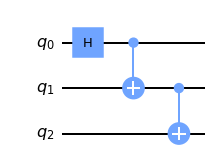

In [52]:
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.draw(output='mpl')

In [21]:
def randomized_circuit(q_input, circ_number, max_iter):
    from qiskit.compiler import transpile

    ## define easy and hard gates

    easy_gate = ['h', 't', 's']
    hard_gate = ['cx']
    basis_gate = easy_gate + hard_gate

    ## transpile the input gate to the equivalent gate with easy and hard gates basis

    q_transform = transpile(q_input, basis_gates=basis_gate)

    random_circuit_set = []

    for circ_ind in np.arange(circ_number):
        ## set easy_layer sets and hard_layer sets
        easy_layer = []
        hard_layer = []
        easy_layer_comp=[]
        hard_seeker=False
        for gate in q_transform.data:
            if gate[0].name in hard_gate:
                hard_layer.append(gate)
                hard_seeker=True
                easy_layer.append(easy_layer_comp)
                easy_layer_comp=[]
            elif gate[0].name in easy_gate:
                if hard_seeker:
                    hard_seeker=False
                    easy_layer_comp=[]
                easy_layer_comp.append(gate)
        easy_layer.append(easy_layer_comp)

        def random_T(easygate,max_mul):
            ## random한걸 h,s,t의 최적으로 바꾸는과정 필요..
            #oper_q = QuantumRegister(1)
            oper = QuantumCircuit(1,name='oper')
            for ind in np.arange(max_mul):
                rand_value = np.random.randint(4)
                if rand_value == 0:
                    oper.h(0)
                elif rand_value == 1:
                    oper.s(0)
                elif rand_value == 2:
                    oper.t(0)
            return oper.to_instruction()

        depth_easy = len(easy_layer)
        depth_hard = len(hard_layer)
        depth = depth_easy+depth_hard

        T_set = []
        T_set.append([])

        for ind in np.arange(depth_hard):
            T_comp = []
            for i in np.arange(q_transform.num_qubits):
                T = random_T(easy_gate,max_iter)
                T_comp.append(T)
            T_set.append(T_comp)

        T_set.append([])
        q_out = QuantumCircuit(q_transform.num_qubits)
        for ind in np.arange(depth):
            if ind % 2 == 0:
                if ind != 0:
                    q_out.append(hard_layer[ind//2-1][0].reverse_ops(),hard_layer[ind//2-1][1])
                    for T_ind in np.arange(len(T_set[ind//2])):
                        q_out.append(T_set[ind//2][T_ind].reverse_ops(),[T_ind])
                    q_out.append(hard_layer[ind//2-1][0],hard_layer[ind//2-1][1])
                for sub_ind in np.arange(len(easy_layer[ind//2])):
                    q_out.append(easy_layer[ind//2][sub_ind][0],easy_layer[ind//2][sub_ind][1])
                for T_ind in np.arange(len(T_set[ind//2+1])):
                    q_out.append(T_set[ind//2+1][T_ind],[T_ind])
                q_out.barrier()
            else:
                q_out.append(hard_layer[(ind-1)//2][0],hard_layer[(ind-1)//2][1])
                q_out.barrier()
        q_final = transpile(q_out, basis_gates=basis_gate, optimization_level=0)
        random_circuit_set.append(q_final)

    return random_circuit_set



In [131]:
def randomized_circuit(q_input, circ_number, max_iter):
    from qiskit.compiler import transpile

    ## define easy and hard gates

    easy_gate = ['x', 'y', 'z', 's']
    hard_gate = ['t', 'h', 'cz']
    basis_gate = easy_gate + hard_gate

    ## transpile the input gate to the equivalent gate with easy and hard gates basis

    q_transform = transpile(q_input, basis_gates=basis_gate)

    random_circuit_set = []

    for circ_ind in np.arange(circ_number):
        ## set easy_layer sets and hard_layer sets
        easy_layer = []
        hard_layer = []
        easy_layer_comp=[]
        hard_seeker=False
        for gate in q_transform.data:
            if gate[0].name in hard_gate:
                hard_layer.append(gate)
                hard_seeker=True
                easy_layer.append(easy_layer_comp)
                easy_layer_comp=[]
            elif gate[0].name in easy_gate:
                if hard_seeker:
                    hard_seeker=False
                    easy_layer_comp=[]
                easy_layer_comp.append(gate)
        easy_layer.append(easy_layer_comp)

        def random_T(easygate, max_mul):
            ## random한걸 h,s,t의 최적으로 바꾸는과정 필요..
            #oper_q = QuantumRegister(1)
            oper = QuantumCircuit(1,name='oper')
            # for ind in np.arange(max_mul):
            rand_value = np.random.randint(4)
            if rand_value == 0:
                oper.x(0)
            elif rand_value == 1:
                oper.y(0)
            elif rand_value == 2:
                oper.z(0)
            return oper.to_instruction()

        depth_easy = len(easy_layer)
        depth_hard = len(hard_layer)
        depth = depth_easy+depth_hard

        T_set = []
        T_set.append([])

        for ind in np.arange(depth_hard):
            T_comp = []
            for i in np.arange(q_transform.num_qubits):
                T = random_T(easy_gate,max_iter)
                T_comp.append(T)
            T_set.append(T_comp)

        T_set.append([])
        q_out = QuantumCircuit(q_transform.num_qubits)
        for ind in np.arange(depth):
            if ind % 2 == 0:
                if ind != 0:
                    q_out.append(hard_layer[ind//2-1][0].reverse_ops(),hard_layer[ind//2-1][1])
                    for T_ind in np.arange(len(T_set[ind//2])):
                        q_out.append(T_set[ind//2][T_ind].reverse_ops(),[T_ind])
                    q_out.append(hard_layer[ind//2-1][0],hard_layer[ind//2-1][1])
                for sub_ind in np.arange(len(easy_layer[ind//2])):
                    q_out.append(easy_layer[ind//2][sub_ind][0],easy_layer[ind//2][sub_ind][1])
                for T_ind in np.arange(len(T_set[ind//2+1])):
                    q_out.append(T_set[ind//2+1][T_ind],[T_ind])
                q_out.barrier()
            else:
                q_out.append(hard_layer[(ind-1)//2][0],hard_layer[(ind-1)//2][1])
                q_out.barrier()
        q_final = transpile(q_out, basis_gates=basis_gate + ['rz', 'ry', 'rx'], optimization_level=3)
        random_circuit_set.append(q_final)

    return random_circuit_set



In [132]:
a=randomized_circuit(qc,10,1)

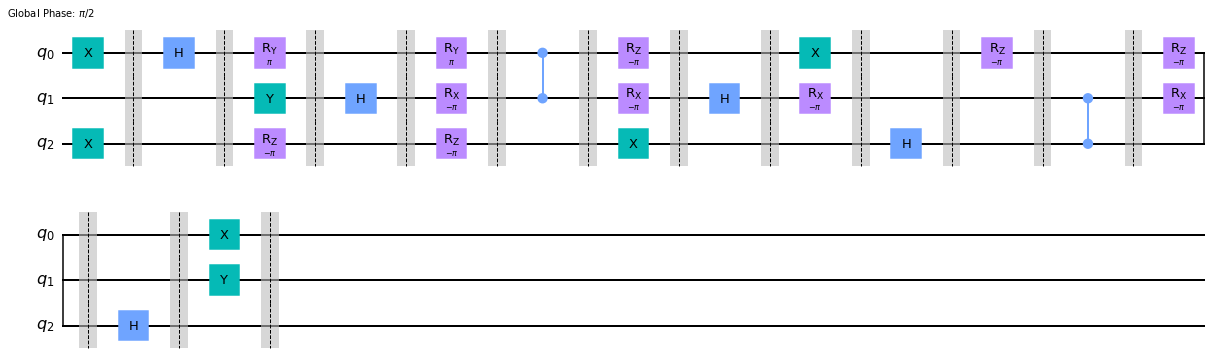

In [133]:
a[0].draw(output='mpl')

In [42]:
from qiskit_experiments.library import StateTomography
from qiskit.quantum_info import DensityMatrix, state_fidelity, Statevector, partial_trace, purity
from qiskit.visualization.utils import _bloch_multivector_data
from qiskit.visualization.bloch import Bloch
from matplotlib import pyplot as plt

qc = QuantumCircuit(3)


qc.draw('mpl')

from qiskit.compiler import transpile

# qc_opt = transpile(qc, basis_gates=['s', 't', 'h', 'rx', 'ry', 'rz', 'cx'], optimization_level=3)
# qc_opt.draw('mpl')

target_state = Statevector.from_instruction(qc)
target_dm = partial_trace(target_state, [1, 2])
print(target_dm)

DensityMatrix([[0.5+0.00000000e+00j, 0. +0.00000000e+00j],
               [0. +0.00000000e+00j, 0.5+8.09608861e-35j]],
              dims=(2,))
